In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df1 = pd.read_excel ('solve_model1.xlsx',index_col = 0, sheet_name='ARK_navn')
df2 = pd.read_excel ('solve_model1.xlsx', index_col = 0, sheet_name='ARK_navn2')
df3 = pd.read_excel ('solve_model1.xlsx', index_col = 0, sheet_name='ARK_navn3')


In [2]:
result = pd.concat([df1, df2, df3], axis=1,  ignore_index=True)
result

,0,1,2
L,1000,1000.0,1050
Y,1000,1100.0,1050
A,1,1.1,1
w,1,1.1,1
N_bar,1000,1000.0,1050
C,1000,1100.0,1050
p,1,1.0,1


In [3]:
def rel_df(df):
    df1 = pd.DataFrame()
    for i in range(1,len(df.columns)):

        col = (df.iloc[:,i]/df.iloc[:,0]-1)*100
        df1.loc[:,'shock'+str(i)] = col
    return df1

In [4]:
rel_res = rel_df(result)


In [5]:
def rel_bar_plot(name, change, title, water):

    # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Horizontal Bar Plot
    ax.barh(name, change)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    ax.set_title(title,
                 loc ='left', )

    # Add Text watermark
    fig.text(0.9, 0.15, water, fontsize = 12,
             color ='grey', ha ='right', va ='bottom',
             alpha = 0.7)

    # Show Plot
    plt.show()

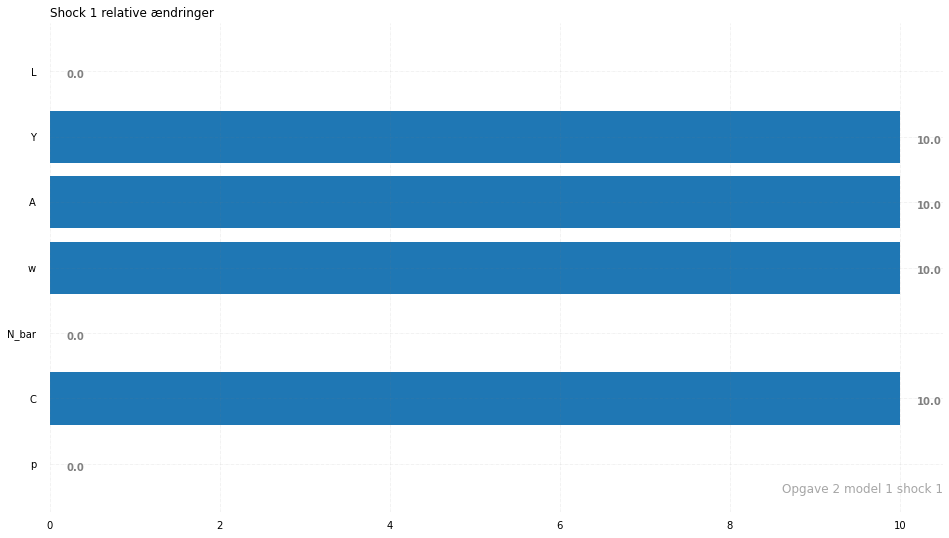

In [6]:
rel_bar_plot(rel_res['shock1'].index, rel_res['shock1'], 'Shock 1 relative ændringer', 'Opgave 2 model 1 shock 1')


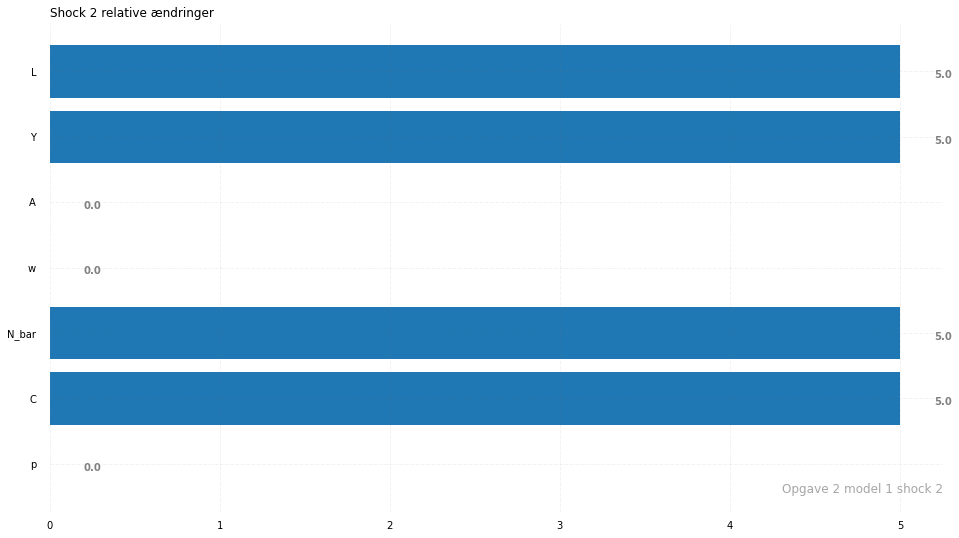

In [7]:
rel_bar_plot(rel_res['shock2'].index, rel_res['shock2'], 'Shock 2 relative ændringer', 'Opgave 2 model 1 shock 2')


In [8]:
df4 = pd.read_excel ('solve_model2.xlsx',index_col = 0, sheet_name='ARK_navn')
df5 = pd.read_excel ('solve_model2.xlsx', index_col = 0, sheet_name='ARK_navn2')
df6 = pd.read_excel ('solve_model2.xlsx', index_col = 0, sheet_name='ARK_navn3')


In [10]:
result2 = pd.concat([df4, df5, df6], axis=1,  ignore_index=True)
rel_res2 = rel_df(result2)

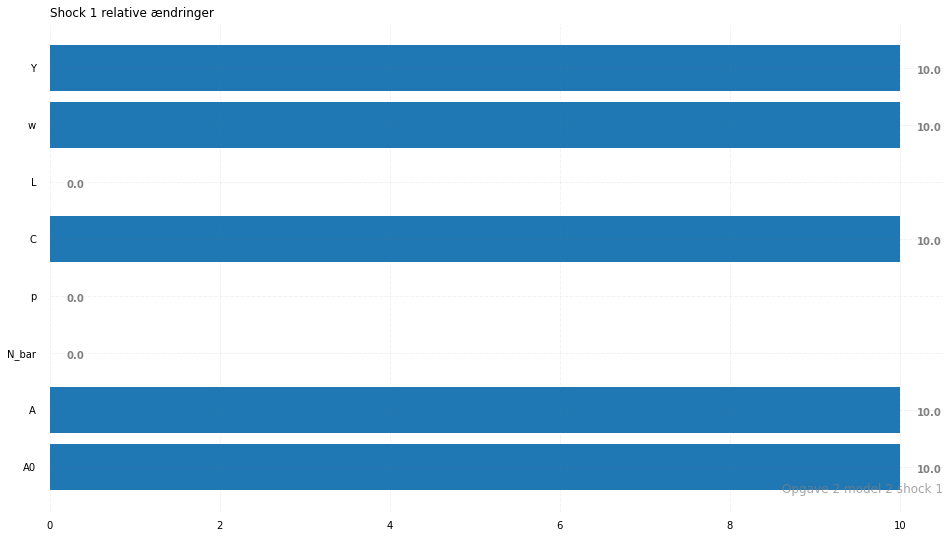

In [11]:
rel_bar_plot(rel_res2['shock1'].index, rel_res2['shock1'], 'Shock 1 relative ændringer', 'Opgave 2 model 2 shock 1')


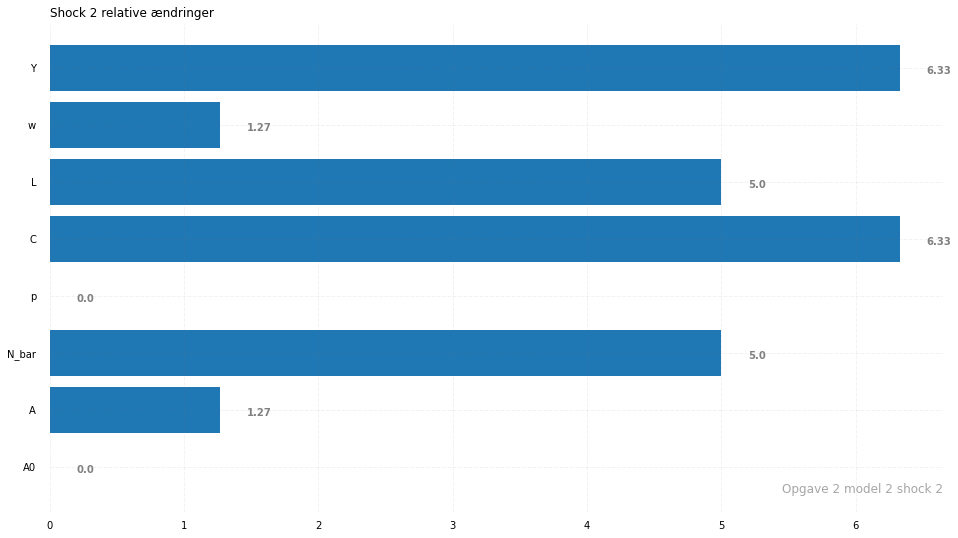

In [12]:
rel_bar_plot(rel_res2['shock2'].index, rel_res2['shock2'], 'Shock 2 relative ændringer', 'Opgave 2 model 2 shock 2')
